<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 : Data Preprocessing
DatasetLink : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

## Importing the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/car data.csv')

## Data exploration

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.shape

(301, 9)

In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [9]:
len(dataset.select_dtypes(include='object').columns)

4

In [10]:
# numerical columns
dataset.select_dtypes(include=['float64','int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [11]:
len(dataset.select_dtypes(include=['float64','int64']).columns)

5

In [7]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [12]:
dataset.isnull().values.any()

False

In [13]:
dataset.isnull().values.sum()

0

## Restructure the dataset

In [14]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
# drop car_name column, not correlated with the target variable
dataset= dataset.drop(columns = 'Car_Name')

In [16]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
# add a column
dataset['Current_Year'] = 2020

In [18]:
dataset['Years_Old'] = dataset['Current_Year'] - dataset['Year'] # determining how old the cars are

In [20]:
dataset = dataset.drop(columns = ['Current_Year','Year'])

In [21]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Encoding the categorical data

In [23]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [24]:
len(dataset.select_dtypes(include='object').columns)

3

In [25]:
dataset['Fuel_Type'].nunique()

3

In [26]:
dataset['Seller_Type'].nunique()

2

In [27]:
dataset['Transmission'].nunique()

2

In [28]:
dataset.shape

(301, 8)

In [29]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [30]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


## Correlation matrix

In [31]:
dataset_2 = dataset.drop(columns ='Selling_Price')

<Axes: title={'center': 'Correlated with Selling Price'}>

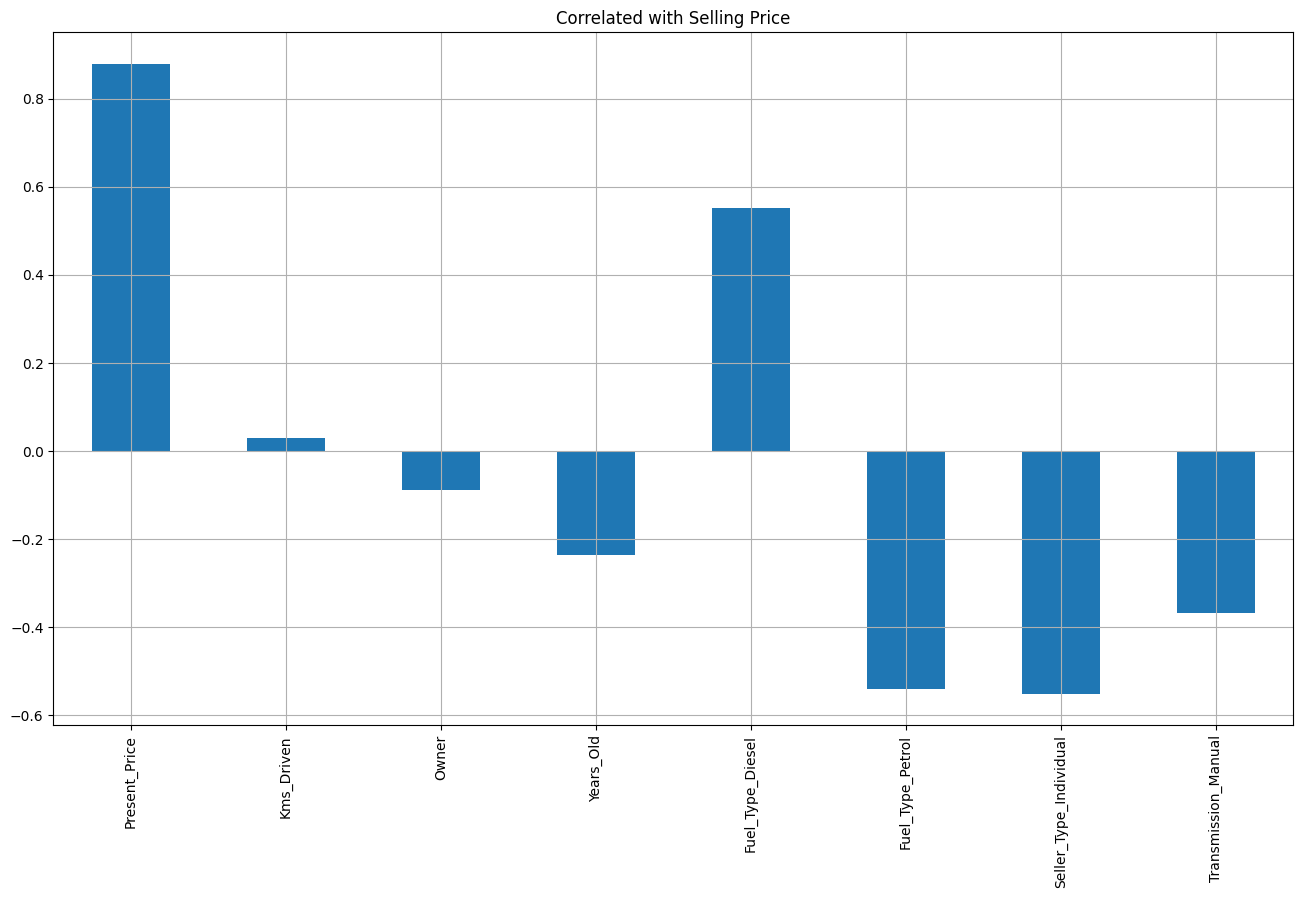

In [32]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize = (16, 9), title = 'Correlated with Selling Price', grid = True
)

In [33]:
corr = dataset.corr()

<Axes: >

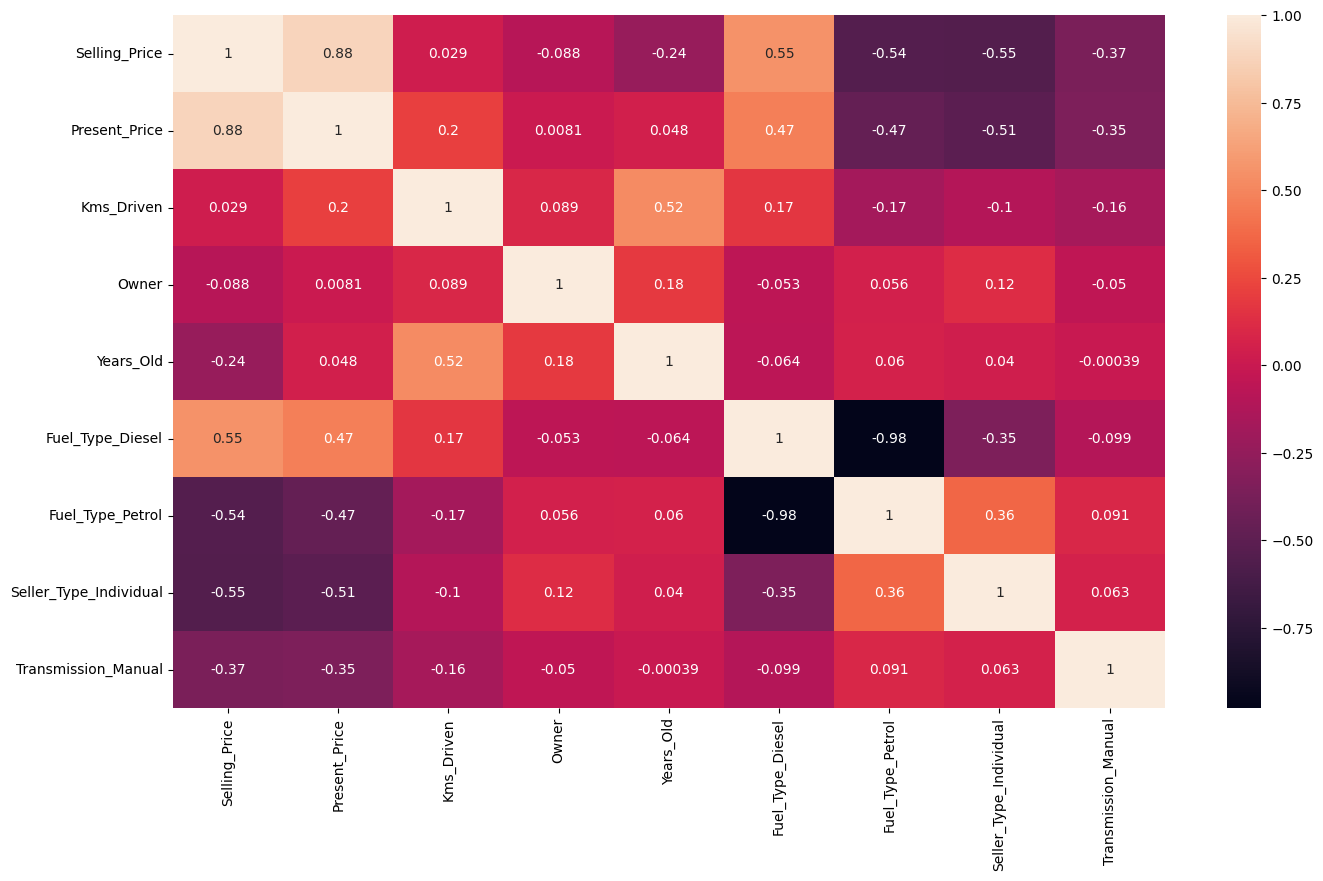

In [34]:
# heatmap
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)

## Splitting the dataset

In [36]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [37]:
# matrix of features
x = dataset.drop(columns = 'Selling_Price')

In [38]:
# target variable
y = dataset['Selling_Price']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)

In [40]:
x_train.shape

(240, 8)

In [41]:
y_train.shape

(240,)

In [42]:
x_test.shape

(61, 8)

In [43]:
y_test.shape

(61,)

# Part 2: Finalizing the model

## 1) Multiple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = regressor_mlr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9144342972228519

## 2) Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
y_pred = regressor_mlr.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9573669550034002

# Part 3: Find the optimal parameters using RandomizedSearchCV\

In [65]:
from sklearn.model_selection import RandomizedSearchCV


In [66]:
parameters = {
    'n_estimators' : [100, 200 , 300, 400 , 500, 600, 700, 800 , 900, 1000],
    'criterion' : ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth' : [10, 20, 30, 40 , 50],
    'min_samples_split' : [2 , 5 , 10 , 50],
    'min_samples_leaf' : [1, 2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [67]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2']}

In [68]:
random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters,n_iter = 10, scoring  ='neg_mean_absolute_error', cv = 5, verbose = 2, n_jobs= -1 )

In [69]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['absolute_error',
                                                      'friedman_mse', 'poisson',
                                                      'squared_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [70]:
random_cv.best_estimator_

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=600)

In [73]:
random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'criterion': 'squared_error'}

In [74]:
random_cv.best_score_

-0.8321909722222219

#Part4 : Final model (Random forest)

In [81]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
y_pred = regressor.predict(x_test)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9539517478248358

# Part 5 : Predicting a single observation

In [84]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [85]:
single_obs = [[8.50, 3500, 0 , 5 ,1 , 0, 0, 1]]

In [86]:
regressor.predict(single_obs) # the predicted price for the given variable

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8.021])